In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights = "imagenet",
                 include_top = False,
                 input_shape=(150, 150, 3))

Using TensorFlow backend.
C:\Users\usaid\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\usaid\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\usaid\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\usaid\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

C:\Users\usaid\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\usaid\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\usaid\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\usaid\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

In [2]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import os

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,horizontal_flip = True,
    fill_mode = "nearest")

base_dir = "C:/Users/usaid/Downloads/dogs-vs-cats-small"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "binary")

Found 2000 images belonging to 2 classes.


In [7]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "binary")

model.compile(loss = "binary_crossentropy",
             optimizer = optimizers.RMSprop(lr = 2e-5),
              metrics = ["acc"])

Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50)


Epoch 1/30
100/100 [==============================] - 41s 414ms/step - loss: 0.4925 - acc: 0.7340 - val_loss: 0.1875 - val_acc: 0.9070
Epoch 2/30
100/100 [==============================] - 35s 349ms/step - loss: 0.2728 - acc: 0.8835 - val_loss: 0.4340 - val_acc: 0.8900
Epoch 3/30
100/100 [==============================] - 35s 350ms/step - loss: 0.2195 - acc: 0.8975 - val_loss: 0.0998 - val_acc: 0.9310
Epoch 4/30
100/100 [==============================] - 35s 352ms/step - loss: 0.1883 - acc: 0.9225 - val_loss: 0.0092 - val_acc: 0.9520
Epoch 5/30
100/100 [==============================] - 35s 352ms/step - loss: 0.1636 - acc: 0.9330 - val_loss: 0.1108 - val_acc: 0.9000
Epoch 6/30
100/100 [==============================] - 35s 353ms/step - loss: 0.1368 - acc: 0.9455 - val_loss: 0.1075 - val_acc: 0.9560
Epoch 7/30
100/100 [==============================] - 35s 353ms/step - loss: 0.1174 - acc: 0.9535 - val_loss: 0.0084 - val_acc: 0.9720
Epoch 8/30
100/100 [==============================] - 

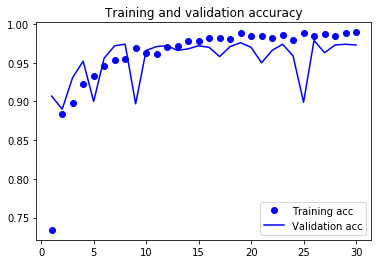

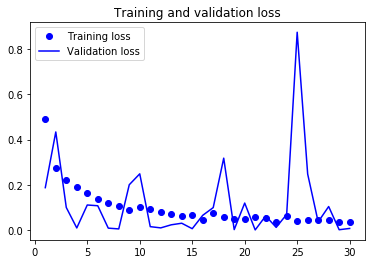

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()